In [1]:
from typing import List
import math
import numpy as np
import matplotlib.pyplot as plt

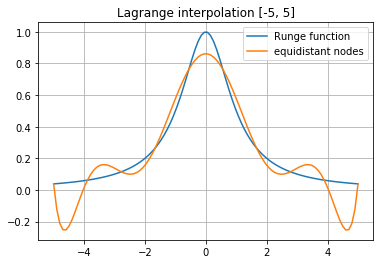

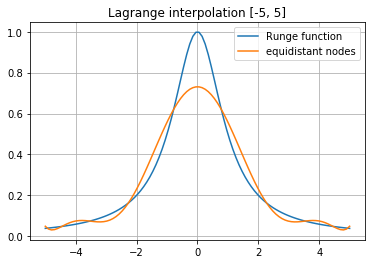

In [2]:
# Problem 1 A)

def create_lagrange_basis(x:np.float, x_int: np.array, pos: int):
    fraction = lambda node:(x-x_int[node])/(x_int[pos]-x_int[node])
    return np.prod(np.array([fraction(node) for node in range(x_int.shape[0]) if node!=pos]))


def create_lagrange_pol(x_int: np.array, y_int:np.array):
    return lambda x: np.sum([create_lagrange_basis(x, x_int, pos)*y_int[pos] for pos in range(x_int.shape[0])])

def get_interpolated_values(x_int: np.array, y_int:np.array, x)->np.array:
    """
    Generates a Lagrange polynomial from x_int and y_int. This polynomial is
    used to calculate the interpolated values of x.
    :param x_int: np.array of size n
    :param y_int: np.array of size n
    :param x: np.array of size m
    :return: np.array of size m
    """
    return np.array([create_lagrange_pol(x_int, y_int)(x_val) for x_val in x])


def runge_function(x:float)->float:
    return 1/(np.power(x, 2)+1)

def generate_chebyshev_nodes(n:int)->np.array:
    nodes = []
    for i in range(1, n+1):
        nodes.append(math.cos((2*i-1)*math.pi/(2*n)))
    return np.array(nodes)

def generate_chebyshev_nodes_transformed(a:float, b:float, n:int)->np.array:
    return 0.5*(a+b)+0.5*(b-a)*generate_chebyshev_nodes(n)

def show_interpolation(lagrange_pol, a:float, b:float, name:str, title:str="Lagrange interpolation"):
    x = np.linspace(a, b, 100)
    y = runge_function(x)
    plt.plot(x, y, label="Runge function")
    plt.plot(x, np.array([lagrange_pol(x[pos]) for pos in range(x.shape[0])]), label=name)
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()

nodes = 10
for a, b, node_type, plot in [[-1, 1, 'equi', False], [-1, 1, 'cheb', False], [-5, 5, 'equi', True], [-5, 5, 'cheb', True]]:
    if node_type == 'equi':
        x_int = np.linspace(a, b, nodes)
    else:
        x_int = generate_chebyshev_nodes_transformed(a, b, nodes)
    y_int = runge_function(x_int)
    lagrange_pol = create_lagrange_pol(x_int, y_int)
    if plot:
        show_interpolation(lagrange_pol, a, b, 'equidistant nodes',  f'Lagrange interpolation [{a}, {b}]')

In [3]:
# Problem 1 B)

def show_interpolation_errors(x:np.ndarray, error_2_norm:np.ndarray, error_inf_norm:np.ndarray, error_bound_inf_norm, title:str, x_axis_name:str=None):
    if len(error_2_norm)>0:
        plt.plot(x, error_2_norm, label="2_norm")
    if len(error_inf_norm)>0:
        plt.plot(x, error_inf_norm, label="inf_norm")
    if len(error_bound_inf_norm)>0:
        plt.plot(x, error_bound_inf_norm, label="error_bound")
    plt.title(title)
    if x_axis_name is not None:
        plt.xlabel(x_axis_name)
    plt.ylabel("error")
    plt.grid()
    plt.legend()
    plt.semilogy()
    plt.show()

def find_inf_norm_error(func, x, y):
   return np.max(np.abs(func(x)-y))

def find_2_norm_error(func, x, y, a, b, N):
    return math.sqrt(b-a)/math.sqrt(N) * math.sqrt((np.sum(np.power(func(x)-y, 2))))

def find_error_bound(n):
    return np.power(np.pi, n+1)/math.factorial(n+1)/np.power(2, n)

The interpolation at x is:

$$f(x)-P_{n}(x)=\frac{f^{n+1}(\gamma)}{(n+1)!}\omega_{n+1}(x)$$

Now, considering $$f(x)=cos(2\pi x)$$, we have that:
$$1=\max_{x \epsilon [0, 1]}|cos(2 \pi x)|=> x=0$$ or $$x=1$$

$$1=\max_{x \epsilon [0, 1]}|sin(2 \pi x)|=> x=0.25$$ or $$x=0.75$$

Keeping in mind that: $$sin'(2 \pi x)=2 \pi cos(2 \pi x)$$ and $$cos'(2 \pi x)=-2 \pi sin(2 \pi x)$$ and that the
max-norm of those functions are 1 ($$x \epsilon [0,1]$$), we can easily see that:

$$\max_{x \epsilon [0, 1]}|sin^{(n)}(2 \pi x)|=\max_{x \epsilon [0, 1]}|(2 \pi)^{n}|=(2 \pi)^{n}$$

and

$$\max_{x \epsilon [0, 1]}|cos^{(n)}(2 \pi x)|=\max_{x \epsilon [0, 1]}|(2 \pi)^{n}|=(2 \pi)^{n}$$

Hence, $$||f^{(n)}(x)||_\infty=(2 \pi)^{n}$$.

$$\omega_{n+1}(x)=\prod_{i=0}^{n}(x-x_i)$$ is a monic polynomial. It can be shown that (theorem 8.7 in the book):
$$\max_{x\epsilon [-1, 1]}|\omega_{n}(x)|\le \frac{1}{2^{2n-1}}$$.

Thus giving:

$$|f(x)-P_{n}(x)|=|\frac{f^{n+1}(\gamma)}{(n+1)!}\omega_{n+1}(x)|\le \frac{(2\pi)^{n+1}}{2^{2n+1}(n+1)!}=\frac{\pi^{n+1}}{2^n(n+1)!}$$

In [ ]:
def calculate_and_show_interpolation_errors(func, a, b, n:int, title:str, show_error_bound:bool=False):
    error_inf_norm = []
    error_2_norm = []
    error_bound_inf_norm = []

    for nodes in range(2, n):
        N = 100*(nodes-1)

        x_nodes = np.linspace(a, b, nodes)
        x = np.linspace(a, b, N)
        y = get_interpolated_values(x_nodes, func(x_nodes), x)
        error_inf_norm.append(find_inf_norm_error(func, x, y))
        error_2_norm.append(find_2_norm_error(func, x, y, a, b, N))
        if show_error_bound:
            error_bound_inf_norm.append(find_error_bound(nodes-1))
    show_interpolation_errors(np.array([x for x in range(1, n-1)]), np.array(error_2_norm), np.array(error_inf_norm), error_bound_inf_norm, title)


f1 = lambda x: np.cos(2*np.pi*x)
f2 = lambda x: np.e**(3*x)*np.sin(2*x)

calculate_and_show_interpolation_errors(f1, 0, 1, 20, "cos(2*PI*x)", True)
calculate_and_show_interpolation_errors(f2, 0, np.pi/4, 20, "e^(3x)*sin(2x)", False)

In [ ]:
# Problem 1C)

def get_piecewise_interpolated_values(a:float, b:float, func, x, K, n):
    K+=1
    sub_intervals = np.linspace(a, b, K)
    interpolated_values = []
    for start in range(sub_intervals.shape[0]-1):
        x_int = np.linspace(sub_intervals[start], sub_intervals[start+1], n+1)
        if start==sub_intervals.shape[0]-2:
            elem_in_range = np.where(np.logical_and(sub_intervals[start]<= x, x<=sub_intervals[start+1]))[0]
        else:
            elem_in_range = np.where(np.logical_and(sub_intervals[start]<= x, x<sub_intervals[start+1]))[0]
        interpolated_values.extend(
            get_interpolated_values(x_int, func(x_int), x[elem_in_range])
        )
    return interpolated_values

x = np.linspace(0, 1, 500)
n = 10
inf_norm_errors = []
for K in range(1, 10):
    interpolated_values = get_piecewise_interpolated_values(-1, 1, f1, x, K, n)
    inf_norm_error = find_inf_norm_error(f1, x, interpolated_values)
    inf_norm_errors.append(inf_norm_error)
show_interpolation_errors(np.array([x for x in range(1, 10)]), np.array([]), inf_norm_errors, np.array([]), "Piecewise-polynomial approximation", "K")
show_interpolation_errors(np.array([x*(n+1) for x in range(1, 10)]), np.array([]), inf_norm_errors, np.array([]), "Piecewise-polynomial approximation", "discretization points")

# We see that the error drops considerably faster (by comparing plot "Piecewise-polynomial approximation" with
# "cos(2*Pi*x)")for the ordinary Lagrange polynomial than for the piecewise-polynomial approximation.
#
# However, in a Lagrange polynomial of degree n, there are n+1 basis polynomials, each of them contain n factors.
# This means that number of calculations necessary to find the Lagrange polynomial scales quadratically with then number
# of points added. Thus, for large values of n, it becomes infeasible to compute. On the other hand piecewise-polynomial
# approximation avoids this problem by considering sub-intervals of the function. The time-complexity for each of the
# sub-intervals are still scaling quadratically, but we can keep this number low (constant), and instead increase the
# number of sub-intervals. The effect of this is that the time-complexity essentially becomes linear (as the nodes for
# each sub-interval is kept constant) with respect to the total number of nodes used.
#
# For large intervals, or situations where we have many nodes, I would use piecewise-polynomial integration, due to the
# computational complexity, as discussed above. If there are few/not too many nodes, I would have used ordinary Lagrange
# interpolation as this generally has a lower error than piecewise-polynomial integration.


In [ ]:
# Problem 1D)

def f(x:np.array):
    first_term = 0.75*np.exp(-np.power(9*x-2, 2)/4)
    second_term = 0.75*np.exp(-np.power(9*x+1, 2)/49)
    third_term = 0.5*np.exp(-np.power(9*x-7, 2)/4)
    fourth_term = -0.1*np.exp(-np.power(9*x-4, 2))
    return first_term+second_term+third_term+fourth_term

def radial_basis_function(w, x, x_i, phi):
    return np.array([np.sum(w*phi(np.absolute(x[pos]-x_i))) for pos in range(len(x))])

def find_radial_basis_function(func, x_i, x, eps):
    phi = lambda x: np.exp(-np.power(eps*x, 2))

    M = phi(np.abs(x_i[:,np.newaxis] - x_i))
    w = np.linalg.solve(M, func(x_i))

    y = radial_basis_function(w, x, x_i, phi)
    return y

def compare_interpolations(func, eps, x:np.ndarray, N:int, K:int, a:float, b:float, title:str):
    rbf_2_norms = []
    lagrange_2_norms = []
    piecewise_pol_2_norms = []
    for n in range(3, N):
        x_int = np.linspace(a, b, n+1)
        rbf = find_radial_basis_function(func, x_int, x, eps)
        rbf_2_norm = find_2_norm_error(func, x, rbf, a, b, x.shape[0])
        rbf_2_norms.append(rbf_2_norm)
        lagrange = get_interpolated_values(x_int, func(x_int), x)
        lagrange_2_norm = find_2_norm_error(func, x, lagrange, a, b, x.shape[0])
        lagrange_2_norms.append(lagrange_2_norm)
        piecewise_pol = get_piecewise_interpolated_values(a, b, func, x, K, n//K)
        piecewise_pol_2_norm = find_2_norm_error(func, x, piecewise_pol, a, b, x.shape[0])
        piecewise_pol_2_norms.append(piecewise_pol_2_norm)

    plt.plot([x for x in range(4, N+1)], np.array(rbf_2_norms), label="rbf")
    plt.plot([x for x in range(4, N+1)], np.array(lagrange_2_norms), label="lagrange")
    plt.plot([x for x in range(4, N+1)], np.array(piecewise_pol_2_norms), label="piecewise")
    plt.title(title)
    plt.xlabel("nodes used")
    plt.xlabel("2-norm error")
    plt.legend()
    plt.grid()
    plt.semilogy()
    plt.show()

compare_interpolations(runge_function, 1, x, 20, 3, -1, 1, "2-norm errors on Runge function")
compare_interpolations(f, 10.5, x, 20, 3, -1, 1, "2-norm errors on exponential function")
